<a href="https://colab.research.google.com/github/ulkster/ELVTR---AI-Finance/blob/main/Emre_Ulkucu_Lesson_8_Financial_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [ ]:
!pip install pmdarima

# Paul's Code:

Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


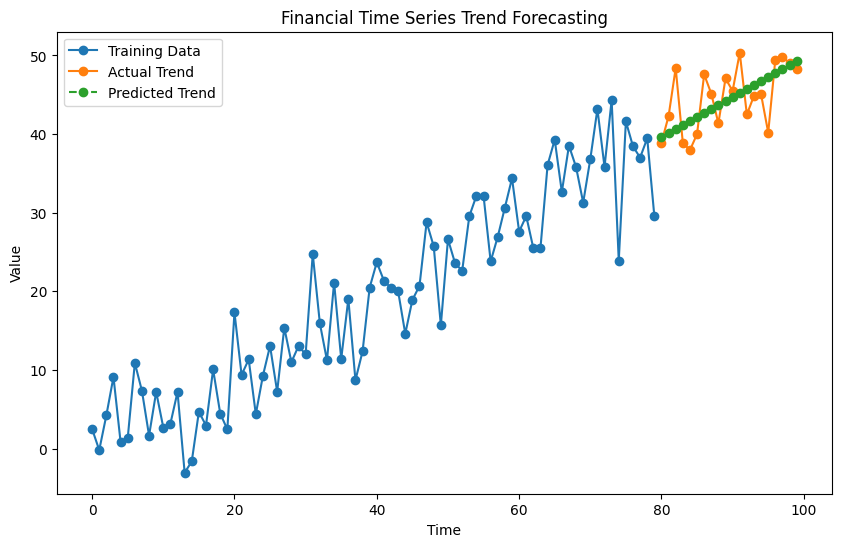

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


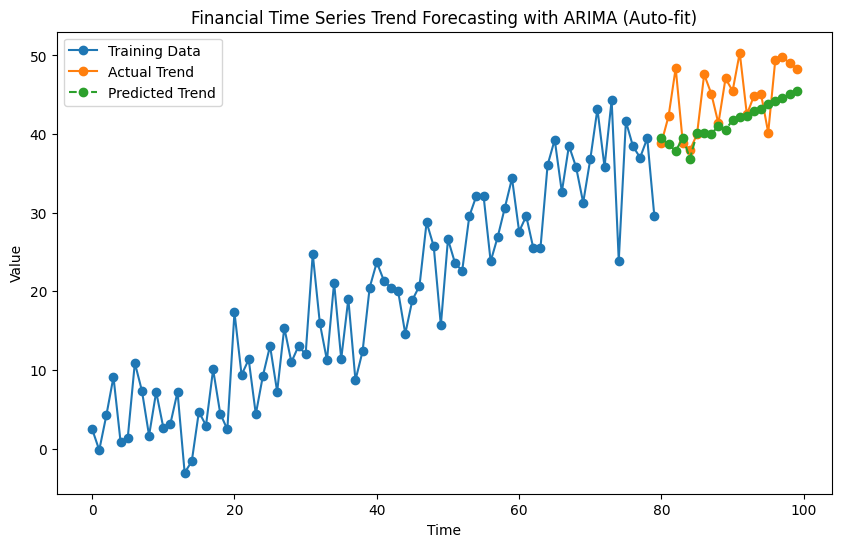

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

<ipython-input-5-a38bbff7acf3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')


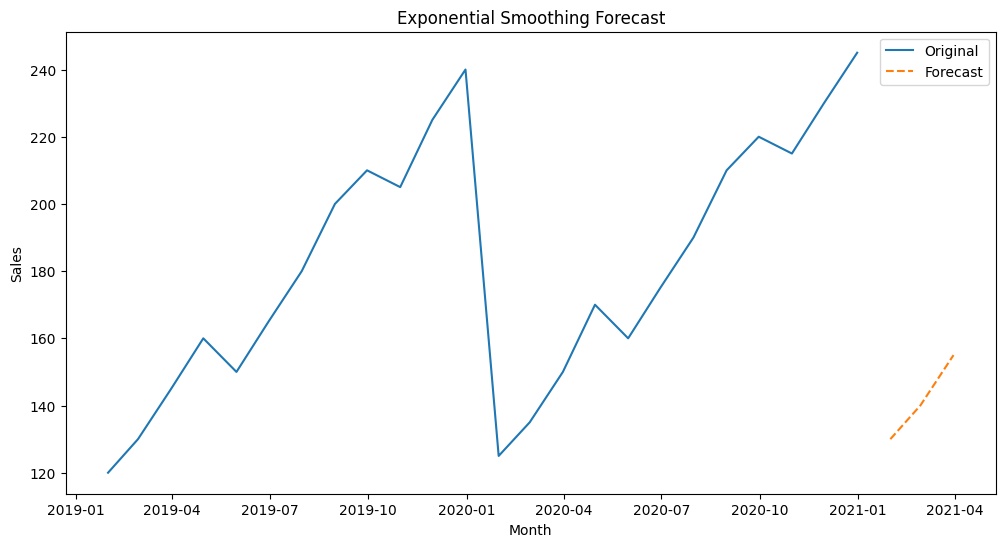

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

---

**Using Novavax (NVAX)**

---

* Vaccine Alternative to Pfizer (PFE) & Moderna (MRNA)
* Biotech R&D
* I've been in and out of this stock with different friends talking about it.
  * Struggled to make any positive ROI so far.
  * Price history has three big spikes & several mid-spikes.
    * It seems like the spikes should be somewhat predictable based on looking at this price chart.

### **SETUP**

##### Install *PMDARIMA* + Import Libraries + **Bold_text** Function

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
# Writing a Bold function for use elsewhere instead of having to type '\033[1m' every time (which is hardly intuitive)
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

##### Get Stock (NVAX) Price Data

* *Novavax* has recurring spikes over its 30-year history.
  * **Complicated** to get a straight answer about when it went public: stock chart goes back to 1995, but the official IPO was not until 2015.  And **each AI-chat has different responses** (Copilot, Gemini, GPT) with dates like July 2001, October 2000, etc.
    * This is **serious issue** with these AI-bots: not only is a query that I would assume would be straight-forward to look up producing multiple responses, you can force them to change their response by just saying "wrong" (Copilot & GPT seem to change the most - Gemini was the most stable).

* I'm trying to use the full history for the model to capture those spikes and predict the next one.
  * I will still use data from 1995 since when looking at the full price chart, that time before the 2015 IPO actually still resembles a similar pattern of these occasional massive spikes.

In [ ]:
# Data Acquisition
stock_data = yf.download('NVAX', start='1995-12-22', end='2024-12-05')    # Trying max data to capture the spike trends
stock_data.sort_index(ascending=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


##### Initial Statistical Info (Pre-Model)

* Using **50-day** & **200-day** moving averages since those are what you'll often see on financial channels/sites.

In [ ]:
# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

In [ ]:
print(bold_text('-------Raw Data-------'))
stock_data      # Show first & last five rows

-------Raw Data-------


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVAX,NVAX,NVAX,NVAX,NVAX,NVAX
Date,,,,,,
1995-12-22,73.75,73.75,80.00,72.50,80.00,1720
1995-12-25,73.75,73.75,80.00,72.50,80.00,1720
1995-12-26,70.00,70.00,75.00,67.50,72.50,2840
1995-12-27,70.00,70.00,73.75,68.75,72.50,2040
1995-12-28,72.50,72.50,72.50,67.50,70.00,1480
...,...,...,...,...,...,...
2024-11-28,8.62,8.62,9.03,8.55,8.80,3623500
2024-11-29,8.72,8.72,8.86,8.50,8.71,1711400


In [ ]:
# prompt: count nulls

# Count nulls in each column
null_counts = stock_data.isnull().sum()

# Print the null counts
null_counts

,,0
Price,Ticker,
Adj Close,NVAX,0
Close,NVAX,0
High,NVAX,0
Low,NVAX,0
Open,NVAX,0
Volume,NVAX,0


**Observations:**

* Of course there shouldn't be any null's since this is stock price data while it was active (I used a starting date near its inception).  Hence, every day should have price info.

* Also, the *'yfinance'* library attaches the **"ticker"** & **'NVAX'** to the dataframe for identification

In [ ]:
# Calculate rolling averages
## Changed to 50 & 200-day moving averages since those are most commonly used in market analysis
stock_data['50_day_avg'] = stock_data['Close'].rolling(window=50, min_periods=1).mean().shift(1)    # Lagged by 1 day
stock_data['200_day_avg'] = stock_data['Close'].rolling(window=200, min_periods=1).mean().shift(1)

In [ ]:
print(bold_text('-------Engineered Data-------'))
stock_data.describe()

-------Engineered Data-------


Price,Adj Close,Close,High,Low,Open,Volume,50_day_avg,200_day_avg
Ticker,NVAX,NVAX,NVAX,NVAX,NVAX,NVAX,,
count,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7.554000e+03,7553.000000,7553.000000
mean,78.481127,78.481127,80.998689,75.705634,78.530972,1.287126e+06,78.704224,79.555391
std,58.863113,58.863113,60.541567,56.883498,58.862640,4.229633e+06,56.964854,52.377000
min,3.690000,3.690000,3.800000,3.530000,3.680000,1.000000e+01,4.159000,5.255550
25%,35.599998,35.599998,37.200001,34.000000,35.799999,5.492500e+03,37.180000,39.716850
50%,66.199997,66.199997,68.420002,63.200001,66.000000,5.118250e+04,68.475000,70.357000
75%,105.000000,105.000000,108.750000,101.800003,105.350000,3.712900e+05,104.092000,104.943750
max,319.929993,319.929993,331.679993,312.000000,324.500000,1.708720e+08,267.971999,240.464000


**Observations:**

* As a *clinical-stage biotech* company, **Novavax** has no price adjustments that might exist for companies with share prices that are more stably high (*'adj close'* = *'close'*).
  * **Examples**:
    * REIT's (like *Redwood Trust*) must distribute a majority of profits back to investors as dividends).
    * Popular stocks with high prices (like *Tesla*, *Nvidia* or even *Chipotle*) split partially so they can achieve a more "democratic" price point for common investors.

* The **range** is extremely **wide** (from ~\$3/share to over $300)
  * Even the **200-day** (which would generally be less drastic since it averages over ~6 months) ranges from ~\$5/share to ~\$200).

* In general, the **Close** price is about half-way between the **High** & **Low**, which makes sense that it settles in the middle of the day's volatility.

* The **Open** & **Close** stats are quite close, which could lead one to infer that there is usually not much of a daily move; *however*, the ".describe()" statistics are **not** time-relative.

* Each column shows the **mean > median**, which means that the distribution of each feature would show a noticeable **right skew**.
  * I would suspect that one factor would be the twenty years of the company being public with a **direct listing** before it officially released an **IPO** in 2015.  It would likely show a much lower trading volume.
  * As for the **prices** showing **right-skew**, this would likely be related to the **massive spikes** I mentioned before as a main reason I want to analyze this stock to at least improve my previously poor timing with entering/exiting this stock.

##### Let's Take a Look

* Rolling Averages (50 & 200-day)
* Volume Over Time
* Seasonal Decomposition

###### **Rolling Averages**

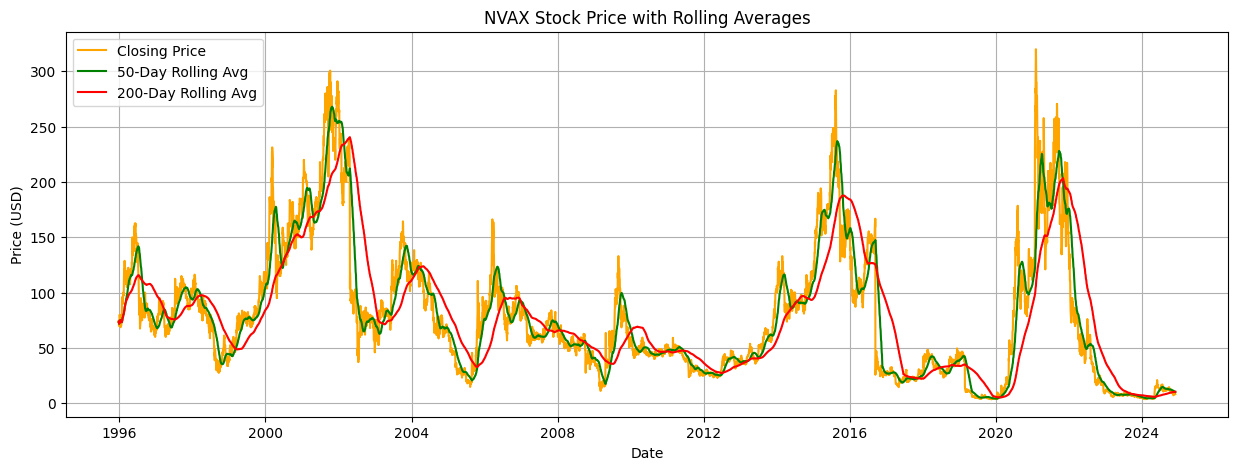

In [ ]:
# prompt: show price graph with both rolling averages

# Plotting the closing price with both rolling averages
plt.figure(figsize=(15, 5))
plt.plot(stock_data['Close'], label='Closing Price', color='orange')
plt.plot(stock_data['50_day_avg'], label='50-Day Rolling Avg', color='green')
plt.plot(stock_data['200_day_avg'], label='200-Day Rolling Avg', color='red')

plt.title('NVAX Stock Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* As one would expect, the averages generally match the pattern of the daily price with the following differences:
  * More smoothing (less jagged)
  * More condensed (lower highs & higher lows)
  * The 200-day, in particular, lags behind in the trend.  In essence, its graph is shifted forwards since it takes more time for that average to capture the daily price fluctuations.

###### **Trading Volume**

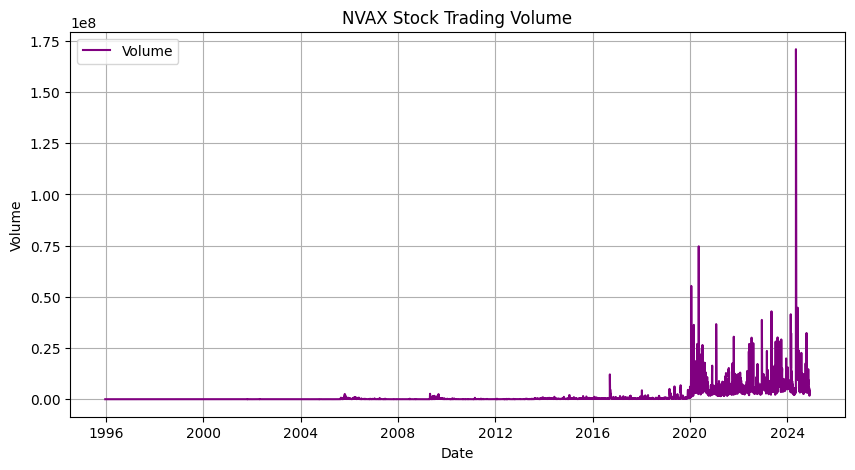

In [ ]:
# prompt: visualize volume

# Assuming 'stock_data' DataFrame from the previous code

# Plotting the volume
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Volume'], label='Volume', color='purple')

plt.title('NVAX Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* With a couple of slight exceptions around 2006, 2010 and 2017, the **vast majority** of **trading** began in **2020** (especially early 2024).

* This could likely be due to the demand in new vaccines from the COVID outbreak.

* Since then, there are multiple spikes in trading volume that were short-lived.  Perhaps a focus on just the last four years will reveal more insight...

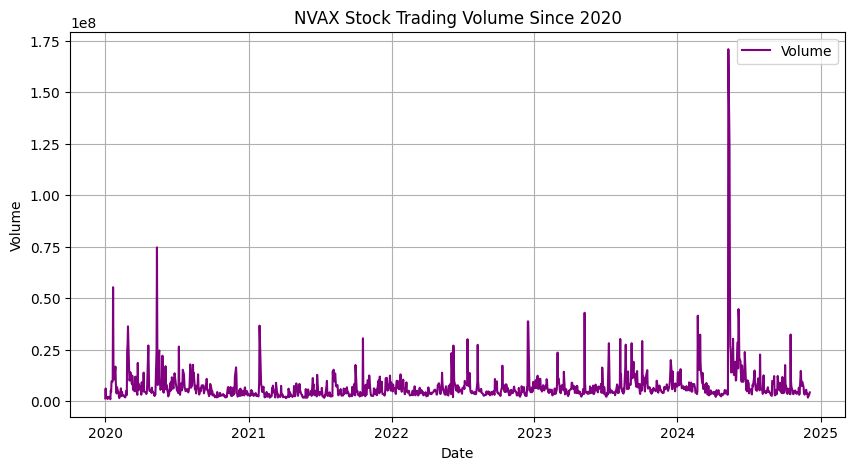

In [ ]:
# prompt: visualize volume since 2020

# Plotting the volume since 2020
plt.figure(figsize=(10, 5))
plt.plot(stock_data[stock_data.index >= '2020-01-01']['Volume'], label='Volume', color='purple')

plt.title('NVAX Stock Trading Volume Since 2020')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* I don't see any obvious time-based patterns in the trading volume, but there are clearly spikes in shares trading hands at multiple points during each year.

* **2020** unsurprisingly saw a **significant** trading **volatility**.
  * The following year saw far more stability.
  * But then trading volume again started to pick up with each subsequent year.
  * Earlier in **2024**, there was a **massive spike** in trading volume.  There was likely a significant result in clinical trial results, propriety, relevant laws, etc.

###### **Seasonal Decomposition**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

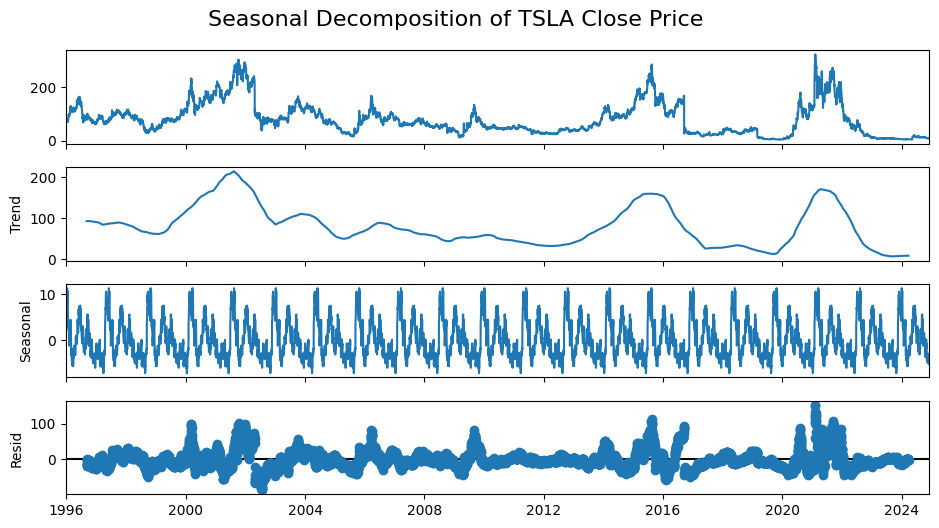

In [ ]:
# prompt: seasonal decomposition in close price

# Setting aside a "period" variable to change it more easily
period = 365    # just using annual patterns for now

# Decompose the 'Close' price
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=period)

# Plot the decomposition
fig = decomposition.plot()

# Access the figure and modify its size
fig.set_size_inches(10, 5)  # widening the default for visibility

plt.suptitle('Seasonal Decomposition of TSLA Close Price', fontsize=16, y=1.05)  # Adding a title
plt.show()

**Observations:**

* I set the *'period'* to *365* to look for patterns that repeat over a full year.  But I would likely try different values with more knowledge about how this stock behaves.
  * Ex: since the IPO released in 2015 (the more relevant starting point for retail investors), there are two similar steep peaks that each return to a valley in a couple years and stay low for a couple more years:
    * **2015-2017** (could be IPO excitement "froth")
    * **2020-2023** (likely inflated by post-COVID vaccine hype)

1. The **first** graph reminds us of the **price chart** since the 1995 public date.

2. For **trend** - it's essentially a **smoothing** of the above graph into a trend in price direction (increasing, decreasing, flat).

3. **Seasonal** - shows patterns throughout each year.  Because I set it to 365 (daily), we can see the result to show a **pattern** that is both **repetetive** and quite **frequent** (~three cycles per year at first glance).  We'll expand a smaller section of this 30-year graph to look at it more closely.

4. **Resid** - the **residuals** are the unpredictable fluctuations in price data that remain after considering trend & seasonality.  In this case, we have *numerous* peaks of uncertainty.  In particular:
  * 2000-2002 (I'm not sure what happened here.  Copilot keeps telling me that **NVAX** went public in 12/2001, but that's not right.  There must have been something about their direct listing around this time).
  * 2015-2017 (IPO released --> likely initial excitement)
  * 2020-2022 (post-COVID vaccine hype)

In [ ]:
seasonal_component = decomposition.seasonal
# Assuming your time series index is a DatetimeIndex
first_quarter_seasonal = seasonal_component[seasonal_component.index.quarter == 1]

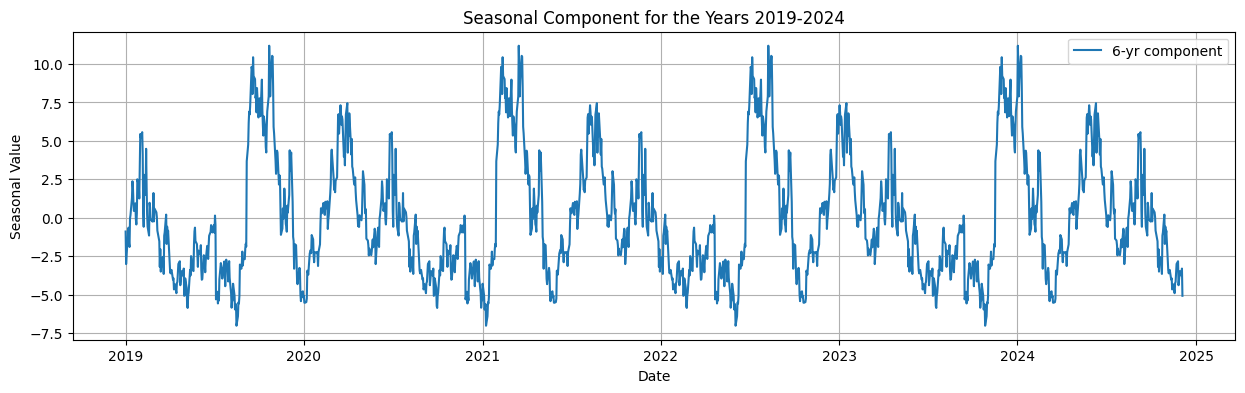

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already performed seasonal decomposition and have the 'decomposition' object

# Define the start and end years for the 5-year period
start_year = 2019
end_year = 2024

# Isolate the seasonal component for the 5-year period
five_year_seasonal = decomposition.seasonal[
    (decomposition.seasonal.index.year >= start_year) & (decomposition.seasonal.index.year <= end_year)
]

# Plot the isolated seasonal component for the 5-year period
plt.figure(figsize=(15, 4))
plt.plot(five_year_seasonal.index, five_year_seasonal.values, label='6-yr component')
plt.title('Seasonal Component for the Years 2019-2024')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* It seems that the nature of this graph is to be have repeating periods.  But you can change the visualized patterns by changing the *'period'*... I'm curious why we don't have the computer discover these seasonal patterns on its own.  This is something that I'll need to look further into.

* With the current **period = 365**, it appears that the:
  * **Trough** alternates between the **beginning of the year** & **mid-year** (ex: 2020 & 2023 = beginning  +  2021 & 2024 = midyear).
  
  * Similarly, the **peaks** appear to also alternate between those two times of the year (2019 & 2022 = midyear  +  2021 & 2024 = beginning).



##### Train / Test Setup

* Whereas we would normally just assign an 80/20 split, because this is **time series**, we don't want a random split (that would have arbitary dates).  Instead, we want the split to be based on the chronology.

* Since I'm trying to use 30 years of price history, I changed the split date to **2019-01-01** since that gives us 6 years (which is 20% of 30 years).
  * That also leaves room for the **recent spike** after COVID (late 2020-21) that many companies (especially health-related) experienced.
  * Although COVID was hardly predictable, the surge does resemble **two prior surges** in the stock history.  I'm curious if such a prediction model will have any success in predicting that at all.

In [ ]:
# Split the data into training and test sets
split_date = pd.to_datetime('2019-01-01')     # Changed split date to have nearly six years remaining for test
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['50_day_avg', '200_day_avg']]
y_train = train['Close']
X_test = test[['50_day_avg', '200_day_avg']]

In [ ]:
# prompt: compare train size and full dataset size proportion

# Calculate the proportion of the training set size to the full dataset size
train_size_proportion = len(train) / len(stock_data)

# Print the result
print(f"Train size proportion: {train_size_proportion}")

Train size proportion: 0.7952078369075987


**Why?** Just showing that using my specific *'split_date'* does acheive an 80% *train* size.

##### Show the Datasets

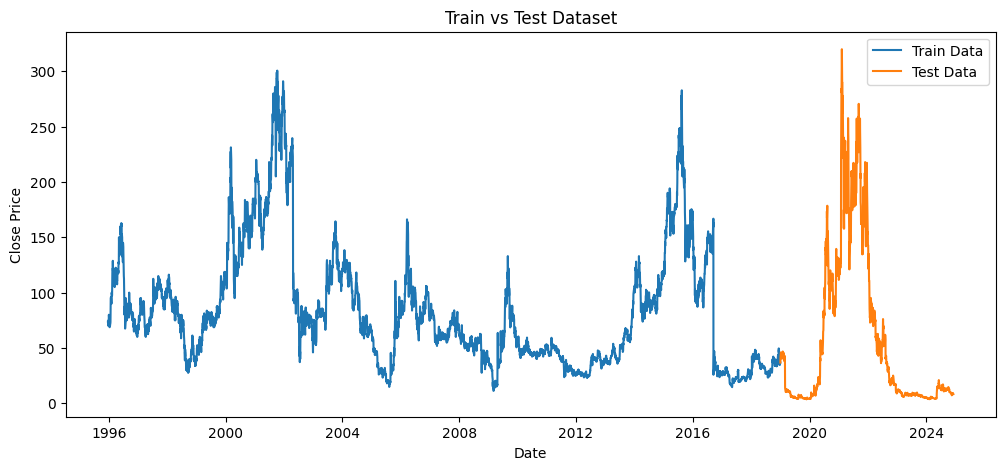

In [ ]:
# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Observations:**

* We are essentially leaving the 2020 post-COVID spike as the **test** data.

* I purposely did this to see if the models could predict that surge since the stock had two similar surges earlier in its history.

### **WORK INSTRUCTIONS**

#### 1. Model Building

* *Linear Regression* with *rolling averages* (**50 & 200-day**) as features

* *ARIMA* - **A**uto**R**egressive **I**ntegrated **M**oving **A**verage

* *Exponential Smoothing* for trend & seasonality

##### **A. Linear Regression**

* Starting with a **simple imputer** for the **rolling averages** on Day 1 since we **lagged** that calculation.

  * Using **median** since it's less affected by such price volatility than **mean**.

In [ ]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with your desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='median')  # Chose 'median'

X_train = imputer.fit_transform(X_train)    # Just need to fill in a median rolling average for Day 1

In [ ]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prompt: predict close price for full dataset with linear

# Make predictions on the entire dataset
X_all = stock_data[['50_day_avg', '200_day_avg']].dropna()  # Drop null rows since we shifted the averages a day
predictions_all = model.predict(X_all)

# Flatten the predictions_all array to make it 1-dimensional
predictions_all = predictions_all.flatten() # Reshape to 1-dimensional

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Predicted_Close': predictions_all}, index=X_all.index)

# Concatenate the predictions with the original data
stock_data_with_predictions = pd.concat([stock_data, predictions_df], axis=1)

# Display the DataFrame with predictions
stock_data_with_predictions.head()

,"(Adj Close, NVAX)","(Close, NVAX)","(High, NVAX)","(Low, NVAX)","(Open, NVAX)","(Volume, NVAX)","(50_day_avg, )","(200_day_avg, )",Predicted_Close
Date,,,,,,,,,
1995-12-22,73.75,73.75,80.00,72.50,80.0,1720,NaN,NaN,NaN
1995-12-25,73.75,73.75,80.00,72.50,80.0,1720,73.750,73.750,74.446976
1995-12-26,70.00,70.00,75.00,67.50,72.5,2840,73.750,73.750,74.446976
1995-12-27,70.00,70.00,73.75,68.75,72.5,2040,72.500,72.500,73.280940
1995-12-28,72.50,72.50,72.50,67.50,70.0,1480,71.875,71.875,72.697922


* The first day has no *averages* or *'predicted_close'* since there's no prior data to calculate those values.

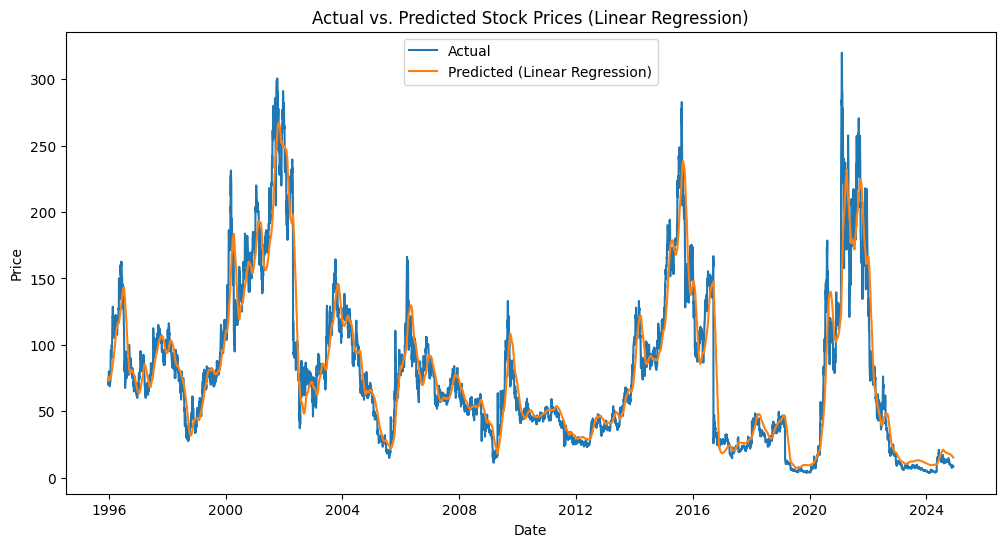

In [ ]:
# prompt: graph actual full stock data and predictions

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual')
plt.plot(stock_data_with_predictions['Predicted_Close'], label='Predicted (Linear Regression)')
plt.title('Actual vs. Predicted Stock Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Predict trend for test set
test.loc[:, 'Predicted_Close'] = model.predict(X_test)    # Specified ".loc[:,]" so that the new column explicitly goes at the end

<ipython-input-37-f6e341f34c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predicted_Close'] = model.predict(X_test)    # Specified ".loc[:,]" so that the new column explicitly goes at the end


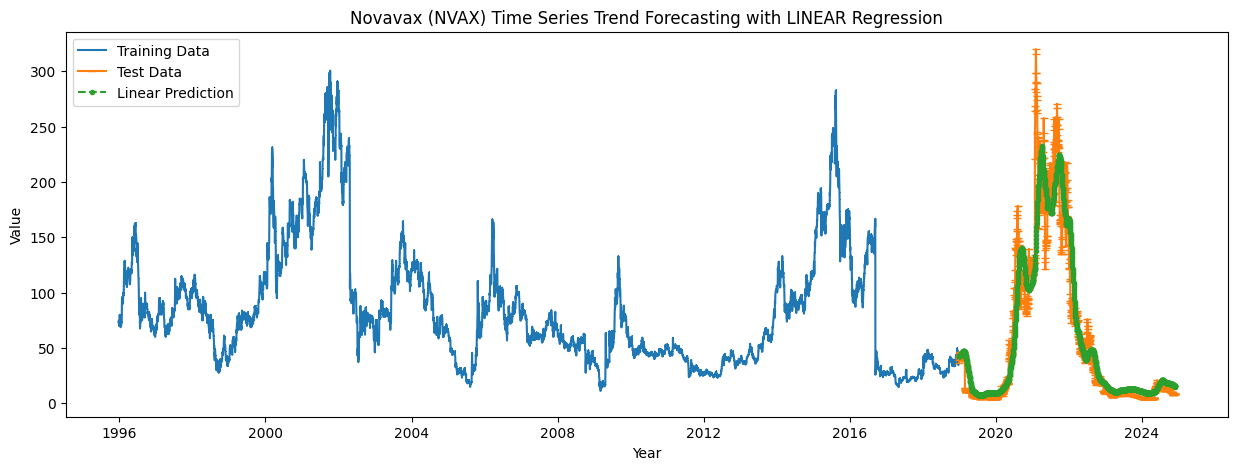

In [ ]:
# Plot the actual and predicted trends
plt.figure(figsize=(15, 5))

# Establish markers for each item being graphed
plt.plot(train.index, train['Close'], label='Training Data', marker=',')    # pixel (keep clean)
plt.plot(test.index, test['Close'], label='Test Data', marker='_')       # horizontal line (can see specific values, if desired)
plt.plot(test.index, test['Predicted_Close'], label='Linear Prediction', linestyle='--', marker='.')    # point do accentuate predicted trend

# Overall labels
plt.title('Novavax (NVAX) Time Series Trend Forecasting with LINEAR Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

**Observations:**

* The **predicted** trend is *surprisingly accurate*, considering how volatile the stock is.
  * It is actually **suspicious** how accurate it is, which may imply **data leak** or other issues I am not able to figure out at the moment.  It would probably be prudent to reevaluate how my predictions are set up since I sometimes get mixed up with variables/dataframes trying to compare lesson materials and what the code generation is doing.

* The prediction is **more conservative** (lower peaks) and **smoother** (which is expected in a prediction), but the overall trend is very close.

In [ ]:
# Linear Regression Performance Metrics (using distinct variable names)
lin_mae = mean_absolute_error(test['Close'], test['Predicted_Close'])
lin_mse = mean_squared_error(test['Close'], test['Predicted_Close'])
lin_rmse = np.sqrt(lin_mse)

# Print performance metrics with bold text and rounding (numbers not bold)
print(bold_text("Mean Absolute Error (MAE):") + f" {lin_mae:.2f}")
print(bold_text("Mean Squared Error (MSE):") + f" {lin_mse:.2f}")
print(bold_text("Root Mean Squared Error (RMSE):") + f" {lin_rmse:.2f}")

Mean Absolute Error (MAE): 13.88
Mean Squared Error (MSE): 561.08
Root Mean Squared Error (RMSE): 23.69


In [ ]:
# prompt: show min & max actual close price

# Explicitly converting the min & max price to "float" since the 'yfinance' library makes the columns into...
# ... type "Series" with the ticker included
print(bold_text("Min Close Price: ") + f"${float(stock_data['Close'].min()):.2f} \n")
print(bold_text("Max Close Price: ") + f"${float(stock_data['Close'].max()):.2f}")

Min Close Price: $3.69 

Max Close Price: $319.93


<ipython-input-40-adbb38c5605a>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(bold_text("Min Close Price: ") + f"${float(stock_data['Close'].min()):.2f} \n")
<ipython-input-40-adbb38c5605a>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(bold_text("Max Close Price: ") + f"${float(stock_data['Close'].max()):.2f}")


**Observations:**

* On average, the **predicted** price is **$13.76 off** of the actual close price.
  * With such a **volatile** stock that has such a **huge range** in price (**\$3.69** --> **\$319.93**), that price differential may not be a big deal when the stock is towards its peaks (in the \$100's, when it's less than 10%).
  * But as we can see from the price charts, the stock is usually much lower (in the single digits), so a \$13 prediction error would certainly be a **big deal** (that is often a **several multiple** error).

* And the *'RMSE'* is **twice as bad** (\$23.68), which makes sense with a volatile stock.

* This result is interesting to analyze since most of the error appears in the upper region of the stock price on the above graph.
  * Strictly from a **visual** perspective, the prediction *seems* pretty **accurate** when the stock is at its lower end.  Perhaps a deeper dive just focusing on the troughs could reveal more meaningful insight in a *future* analysis.

##### **B. ARIMA**

In [ ]:
from pmdarima import auto_arima

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) # Suppress FutureWarnings

!pip install --upgrade scikit-learn

In [ ]:
# Auto-fit ARIMA model
auto_model = auto_arima(train['Close'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train['Close'])

In [ ]:
# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test['Close']))

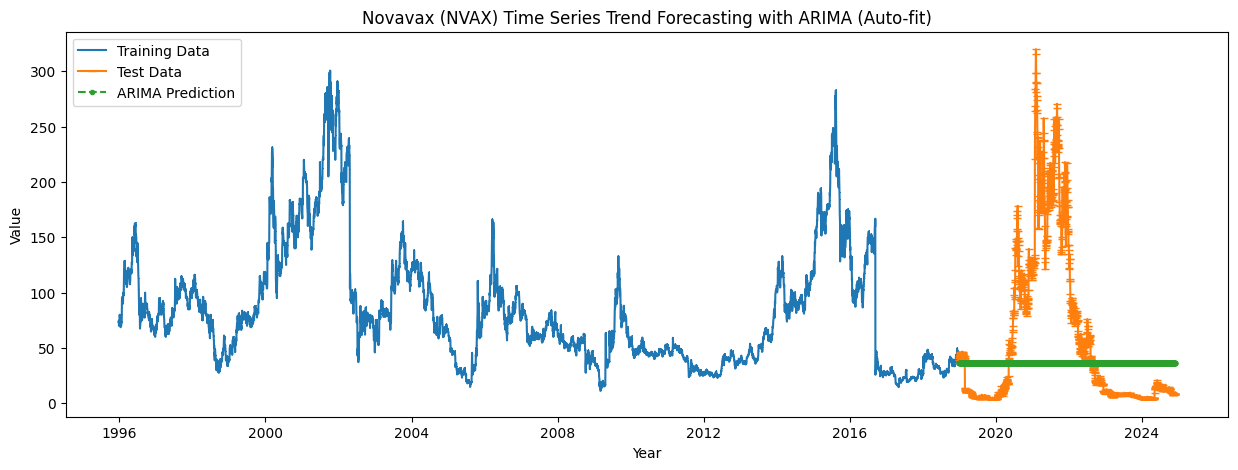

In [ ]:
# Plot the actual and predicted trends
plt.figure(figsize=(15, 5))

plt.plot(train.index, train['Close'], label='Training Data', marker=',')
plt.plot(test.index, test['Close'], label='Test Data', marker='_')
plt.plot(test.index, forecast, label='ARIMA Prediction', linestyle='--', marker='.')

plt.title('Novavax (NVAX) Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# ARIMA Performance Metrics (using distinct variable names)
arima_mae = mean_absolute_error(test['Close'], forecast)
arima_mse = mean_squared_error(test['Close'], forecast)
arima_rmse = np.sqrt(arima_mse)

# Print performance metrics with bold text and rounding (numbers not bold)
print(bold_text("Mean Absolute Error (MAE):") + f" {arima_mae:.2f}")
print(bold_text("Mean Squared Error (MSE):") + f" {arima_mse:.2f}")
print(bold_text("Root Mean Squared Error (RMSE):") + f" {arima_rmse:.2f}")

Mean Absolute Error (MAE): 52.76
Mean Squared Error (MSE): 5605.28
Root Mean Squared Error (RMSE): 74.87


**Observations:**

* Unsurprisingly based on just looking at the graph, the *ARIMA* performed **much worse** than *Linear Regression* (by about 4x: \$53 error vs. \$13).

##### **C. Exponential Smoothing**

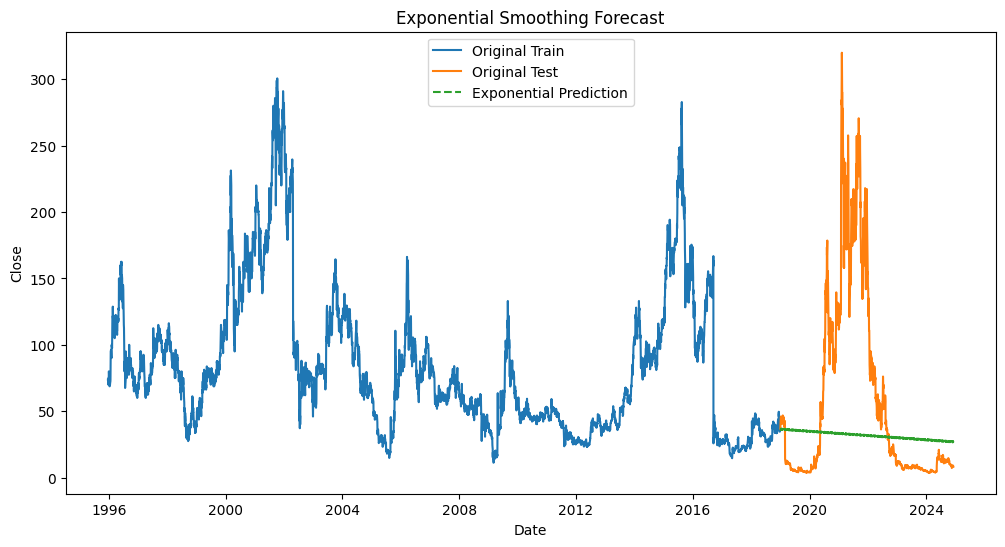

In [ ]:
# prompt: exponential smoothing

from statsmodels.tsa.api import ExponentialSmoothing

model_es = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next periods
forecast_es = model_es.forecast(len(test))

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Original Train')
plt.plot(test['Close'], label='Original Test')
plt.plot(forecast_es, label='Exponential Prediction', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Exponential Smoothing Performance Metrics (using distinct variable names)
es_mae = mean_absolute_error(test['Close'], forecast_es)
es_mse = mean_squared_error(test['Close'], forecast_es)
es_rmse = np.sqrt(es_mse)

# Print performance metrics with bold text and rounding (numbers not bold)
print(bold_text("Mean Absolute Error (MAE):") + f" {es_mae:.2f}")
print(bold_text("Mean Squared Error (MSE):") + f" {es_mse:.2f}")
print(bold_text("Root Mean Squared Error (RMSE):") + f" {es_rmse:.2f}")

Mean Absolute Error (MAE): 51.10
Mean Squared Error (MSE): 5762.09
Root Mean Squared Error (RMSE): 75.91


**Observations:**

* Again, the *Exponential Smoothing* was **much worse** than *Linear Regression.*

* In fact, since the **forecast lines** are similar, it is unsurprising that the performance metrics are similar.

#### 2. Performance Metrics

In [ ]:
# prompt: show comparison chart for all three model performances with reverse line graph

# I broke it into three code blocks so the work, numerical table, and graph are separate

import matplotlib.pyplot as plt
import pandas as pd

# Assuming comparison_df from the previous code
# Sample data (replace with your actual data)
data = {'Model': ['Linear Regression', 'ARIMA', 'Exponential Smoothing'],
        'MAE': [lin_mae, arima_mae, es_mae],
        'MSE': [lin_mse, arima_mse, es_mse],
        'RMSE': [lin_rmse, arima_rmse, es_rmse]}
comparison_df = pd.DataFrame(data)

In [ ]:
# Display the comparison DataFrame
comparison_df

,Model,MAE,MSE,RMSE
0,Linear Regression,13.879759,561.076161,23.687046
1,ARIMA,52.762734,5605.284433,74.868448
2,Exponential Smoothing,51.101681,5762.091672,75.908443


* This table just helps to bring all the numerical metrics together

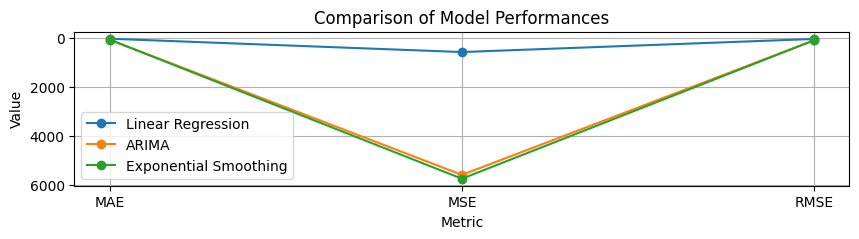

In [ ]:
# Transpose the DataFrame for easier plotting
comparison_df = comparison_df.set_index('Model').transpose()

# Create the reverse line plot
plt.figure(figsize=(10, 2))
for model in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df[model], label=model, marker='o')

plt.title('Comparison of Model Performances')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis for reverse order
plt.grid(True)
plt.show()

**Observations:**

* With this visualization, we can *see* how big of a difference the *MSE* is between **Linear Regression** and the other two (as we previously mentioned).
  * This huge gap is due to the *MSE* being a *squared* error (so the multiple of >3x in *RMSE* becomes >9x).

#### 3. Model Comparison & Interpretation

* **Forecasted** vs. **Actual** in *test* set w/ visual plot

* **Intepret** model results & discuss possible **discrepancy** factors

* **Implications** for model performance on **real-world decision-making**

##### **A. Forecasted vs. Actual Test Set Values**

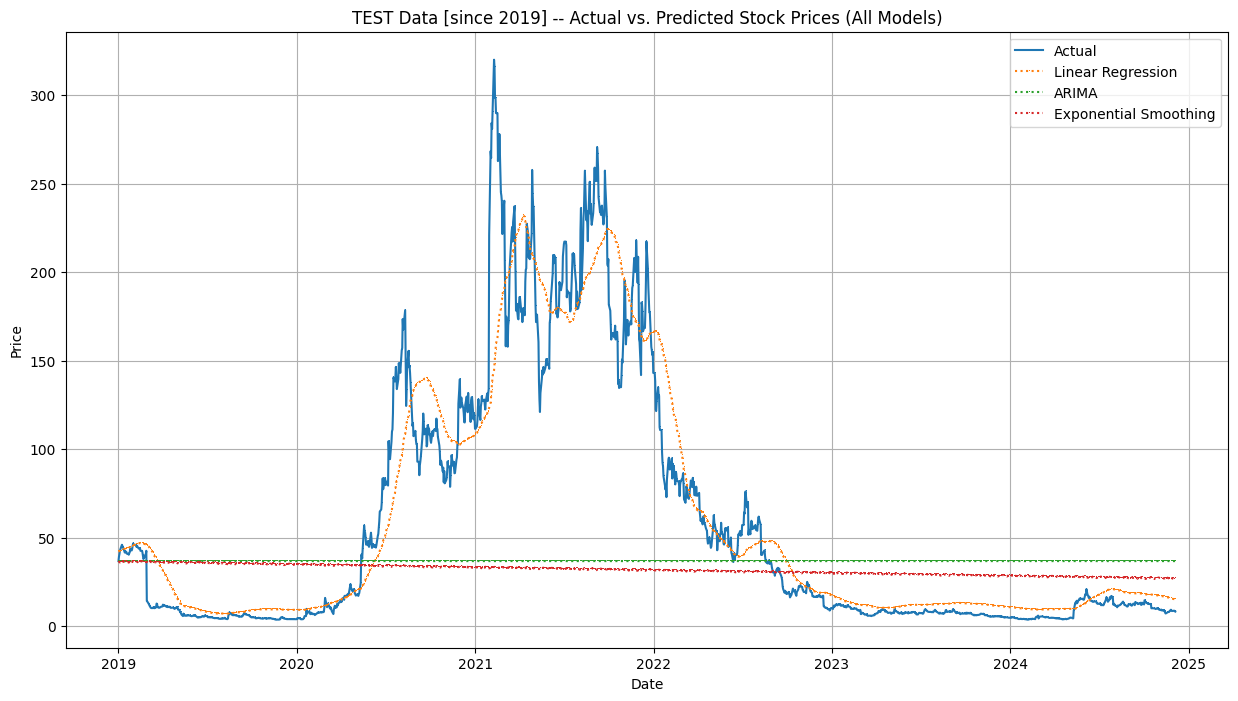

In [ ]:
# prompt: graph actual test values with predicted linear, arima & exponential together

# Plot actual vs predicted values for all models
plt.figure(figsize=(15, 8))   # Using a bigger figure size so we can better see the results more closely

# Using the pixel marker=',' for all graphs to minimze the extra markings
plt.plot(test.index, test['Close'], label='Actual', marker=',')   # keep default linestyle so it stands out
plt.plot(test.index, test['Predicted_Close'], label='Linear Regression', linestyle=':', marker=',')
plt.plot(test.index, forecast, label='ARIMA', linestyle=':', marker=',')
plt.plot(test.index, forecast_es, label='Exponential Smoothing', linestyle=':', marker=',')


plt.title('TEST Data [since 2019] -- Actual vs. Predicted Stock Prices (All Models)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* By focusing just on the **test** data here, we can see more closely how each model performed at predicting.

* The **Linear Regression** model generally seemed to be a bit **shifted right**

* We can more easily see how the **Exponential Smoothing** had a more **downward trend** overall began to **converge** with the **actual prices** while starting to **diverge** from the **ARIMA** after they started out nearly identical.

##### **B. Interpret Results & Discrepancies**

1. The **Linear regression** uses *moving averages* in its calculation, which is why it reminds me especailly of the **50-day**.  I explore this in more detail below.
  * For now, it uses a **coefficient** for each *moving average* and combines them to predict the *closing price.*  Since our averages are generally close to the actual prices, the resulting prediction is pretty good.
  * But as we mentioned before, **data leak** can introduce bias into the *training*, which could affect its **perceived success** with the *test data*.

2. In **ARIMA**:
  * The **AR** looks at past **short-term results** (which figures the price will likely stay at a similar level from yesterday to today to the next day).
  * **I** is similar in looking at past performance, but focused on the **long-term trend**.  So isf there was a general movement in a particular direction, it would continue that.  For this stock, however, there is kind of a downward trend but with big spikes that throw off that trend.
  * To accommodate for **past errors**, the **MA** functions like a feedback loop to help the model learn from past mistakes.  It does this by **smoothing out noise (fluctuations)** and **correcting for trend bias** (ex: just because a stock is on a recent upswing does *not* mean it won't take a swing in the other direction... as is evidenced numerous times throughout this stock's history).
  * So with these three different aspects that each look at a different perspective of the overall graph, it is understandable that the **test prediction** is basically **flat** since the stock is so **volatile** & **unpredictable**.

3. Lastly, **Exponential Smoothing** emphasizes recent behavior in order to make its prediction like a weather forecast and updates based on newest information.
  * The weights of recent data history **decrease exponentially** the further back you go, getting smaller faster (ex: 0.5 -> 0.25 -> 0.0625 -> 0.0039, etc.).
  * One medaphor (from Gemini) is to consider a stack of pancakes with syrup being poured on them: the top pancake is the most recent data point and gets the most syrup, with each pancake beneath getting less and less syrup.
  * I would think that this would help it follow the actual trend more closely during the *test* set, but perhaps it does relate to why it gets closer to the end tail as it approaches the final (most recent) data.

###### Deeper Dive into Linear Regression

* Since it uses moving averages in its calculation, I'm curious how it compares to those.

In [ ]:
test.head()

Price,Adj Close,Close,High,Low,Open,Volume,50_day_avg,200_day_avg,Predicted_Close
Ticker,NVAX,NVAX,NVAX,NVAX,NVAX,NVAX,,,
Date,,,,,,,,,
2019-01-01,36.799999,36.799999,38.000000,36.400002,38.000000,311890,38.356,33.727,42.340892
2019-01-02,39.400002,39.400002,39.400002,34.000000,34.400002,508745,38.356,33.711,42.344039
2019-01-03,40.799999,40.799999,42.400002,38.400002,38.599998,485095,38.468,33.703,42.472118
2019-01-04,42.799999,42.799999,45.400002,41.000000,45.000000,902480,38.552,33.697,42.568177
2019-01-07,45.200001,45.200001,47.400002,43.400002,43.799999,850960,38.696,33.701,42.730040


In [ ]:
train.head()

Price,Adj Close,Close,High,Low,Open,Volume,50_day_avg,200_day_avg
Ticker,NVAX,NVAX,NVAX,NVAX,NVAX,NVAX,,
Date,,,,,,,,
1995-12-22,73.75,73.75,80.00,72.50,80.0,1720,NaN,NaN
1995-12-25,73.75,73.75,80.00,72.50,80.0,1720,73.750,73.750
1995-12-26,70.00,70.00,75.00,67.50,72.5,2840,73.750,73.750
1995-12-27,70.00,70.00,73.75,68.75,72.5,2040,72.500,72.500
1995-12-28,72.50,72.50,72.50,67.50,70.0,1480,71.875,71.875


**Observations:**

* After some exploration, I found that the *test* dataframe now had **two more columns** that do not appear in the *train* dataframe: *'MA_50'* & *'MA_200'*.
  * I certainly did not add those manually, and an interesting "conversation" with Gemini led me to theorize that it has something to do with how the prediction models were functioning since the *train* set was not affected by that.

  * **Update 12/24/24** -- those two columns were *not* created now, so I'll comment out those lines in the below code block to graph all price curves.

* So I decided to spend some time and graph them all together to see how they line up.

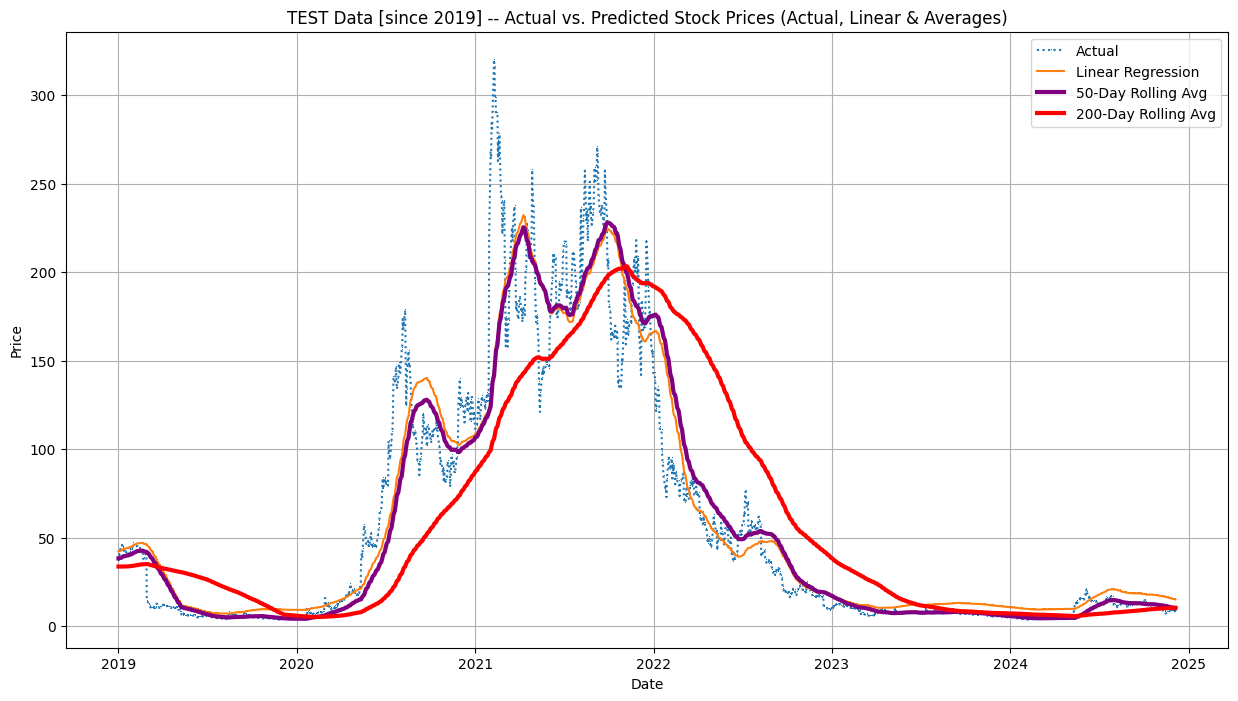

In [ ]:
# prompt: graph the test data

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Using a bigger figure size for better visualization

plt.plot(test.index, test['Close'], label='Actual', linestyle=':', marker=',')    # Making this dotted so it is kind of "in the background"
plt.plot(test.index, test['Predicted_Close'], label='Linear Regression', marker=',')
plt.plot(test['50_day_avg'], label='50-Day Rolling Avg', color='purple', linewidth=3)   # thickening these to compare better
plt.plot(test['200_day_avg'], label='200-Day Rolling Avg', color='red', linewidth=3)
#plt.plot(test['MA_50'], label='MA_50', linestyle='--', color='lime')    # so you can see when it lines up w/ "50-Day Rolling Avg"
#plt.plot(test['MA_200'], label='MA_200', linestyle='--', color='cyan')    # so you can see when it lines up w/ "200-Day Rolling Avg"


plt.title('TEST Data [since 2019] -- Actual vs. Predicted Stock Prices (Actual, Linear & Averages)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

* It took some finangling with display colors & styles in order to see all the graphs distinctly, but for the most part, the new *'MA_50'* & *'MA_200'* line up with their counterparts (*'50-day'* & *'200-day'*).

* **However**, there is a **noticeable difference** right at the beginning of the *test* data in **2019**.  This leads me to believe that it, indeed, has something to do with the prediction functionality since averages are involved in those calculations.

* **Update 12/24/24** -- The *MA* features were not added (presumably because I imputed the Day 1's rolling averages after lagging the calculation).

##### **C. Implications on Real-World**

1. Starting with the **Linear Regression** prediction (**before** the *train/test* split), an impatient assumption would likely be that it is nearly perfect and should be trusted without question.  But this is likely a classic case of model overconfidence, and there are almost undoubtedly other factors that are contributing to its significant collinearity with the actual price data.
  * Even after performing the *train/test* split, the predictions on the *test* set were very successful.  Since I chose **Novavax** for this assignment because I have tried to get in at opportune times more than once on the advice of multiple friends who are well-educated, I will probably at least try to test this model with some mild buy/sell timings to see how it works on **unseen/out-of-time** (i.e. *future*) cycles.

2. When looking at the *rolling averages*, it seems that specifically the **200-day** may provide some guidance as far as timing (since the **50-day** is still a bit too jagged and similar to the stock's volatility --> hard to time).  Specifically, I think that I notice the general patterns:
  * After the **200-day** trends **downward** for a while then appears to begin recovering (creating a valley), it is generally either on an existing **surge** in the **actual** price that recently began and will continue upward for a while or (better yet) lines up with a **valley** in the **actual price.**  This could suggest a solid **buying opportunity**.  And even with the stock's volatility, there are multiple fast spikes on the way up.  Looking at the most recent data on the graph, it would appear that **right now** could be a great re-entry point since the pattern would suggest another surge is imminent.
  * On the other end, trying to time a **sell** (which is just as important, if not moreso), the **intersection of all three** (particularly when the **200-day** is trending **up** and the **actual** & **50-day** are trending **down**) signals a good **sell** time.  At those points, the stock generally seems to be on a **significant slide** that the **200-day** has not caught up with yet, but soon will.

3. With the current models how they're structured at the moment, **neither** the **ARIMA** nor the **Exponential Smoothing** seem to provide any useful information.  Perhaps since my *test* data included a recent post-COVID surge, they were unable to predict any pattern (aside from an **overall downward slide**, which is hardly inspiring).  Perhaps if I reassign the *train/test* split or delve further into their constructions/functionality/etc., I can better tune them to perform more succesfully.  I did expect better results because of their more complex nature, but there is always more to explore.

## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

##### *Reload/Prepare Data for LSTM*

* Reprep so this **section** runs on its **own**.

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

#####################################

# Bold function
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

#####################################

# Data Acquisition
stock_data = yf.download('NVAX', start='1995-12-22', end='2024-12-24')    # Trying max data to capture the spike trends
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

#####################################

# Calculate rolling averages
stock_data['50_day_avg'] = stock_data['Close'].rolling(window=50, min_periods=1).mean().shift(1)    # Lagged by 1 day
stock_data['200_day_avg'] = stock_data['Close'].rolling(window=200, min_periods=1).mean().shift(1)

#####################################

# Split the data into training and test sets
split_date = pd.to_datetime('2019-01-01')     # Changed split date to have nearly six years remaining for test
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data
X_train = train[['50_day_avg', '200_day_avg']]
y_train = train['Close']
X_test = test[['50_day_avg', '200_day_avg']]

#####################################

# Impute median for missing Day 1 rolling averages (that are lagged by a day)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Chose 'median'

X_train = imputer.fit_transform(X_train)


[*********************100%***********************]  1 of 1 completed


### **Start LSTM**

##### *Ready Tensorflow*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

* Not sure why it's showing a Missing Imports error with a red underline, but it doesn't actually seem to cause any problems.

#### Prepare Data

* Scale (*MinMax* on a -1:1 scale)
* Train/Test Split

In [ ]:
# prompt: lstm

# Data scaling (especially useful for such a volatile stock with wide range in price history)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

######################################

# Splitting data into training and testing sets
train_size = int(len(scaled_data) * 0.8)    # This allows to avoid having to explicitly choose a split date (more flexible moving forward)
train_data = scaled_data[:train_size]       # This still gathers first data sequentially
test_data = scaled_data[train_size:]

# Creating sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50           # Fifty day sequence (default).  Can experiment with other values based on perceived price patterns
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

#### Build & Train Model

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))         # Applies a weighted sum and activation function
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model & assigning to a "history" variable for plotting a loss curve
history = model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size as needed

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - loss: 0.0080
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 9.3231e-04
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 8.5607e-04
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - loss: 6.9473e-04
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 5.4655e-04
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 4.9930e-04
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 4.0525e-04
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 3.0052e-04
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 3.1574e-04
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 3.7550e-04


**Observations:**

* We get a "UserWarning" about the *'input_shape'* syntax (not a major issue right now but could be addressed later).

* Each **epoch** is a complete pass through the full *training* set.
  * The model learns and adjust parameters during each epoch since its exposed to all training examples.

* **Loss** of each epoch shows the **difference** between predicted vs. actual results.
  * In this case, the loss starts out @ 0.01 in the first epoch then quickly converges to a much **better** value < 0.001 (1.0e-03) and improves with each epoch (which makes sense since the model should be learning and improving).

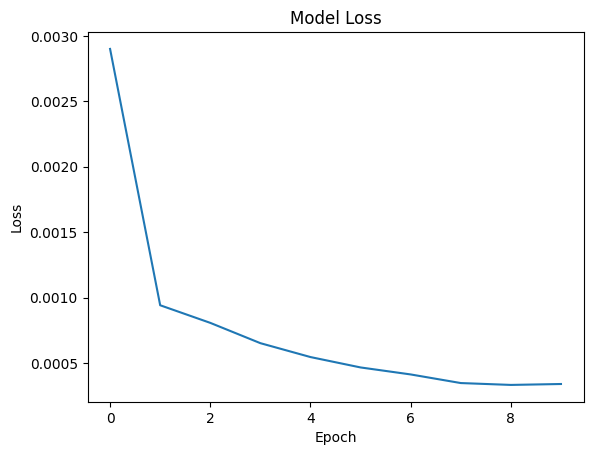

In [ ]:
# prompt: graph epoch loss curve of the lstm model above

plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

**Observations:**

* Looks kind of like an elbow curve

* As we noted from the numerical results above, the **first epoch** shows the **sharpest turn** in loss output, with little change past that.

#### Make Predictions

In [ ]:
# Making predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


#### Visualize LSTM Predictions on Test Set

* I put the visualization before the model evaluation since I include comparisons to the other models' performances down below that require running earlier code from the main assignment.  But this **graph** is also part of the **self-contained extra credit** code that should not require running anything above it.

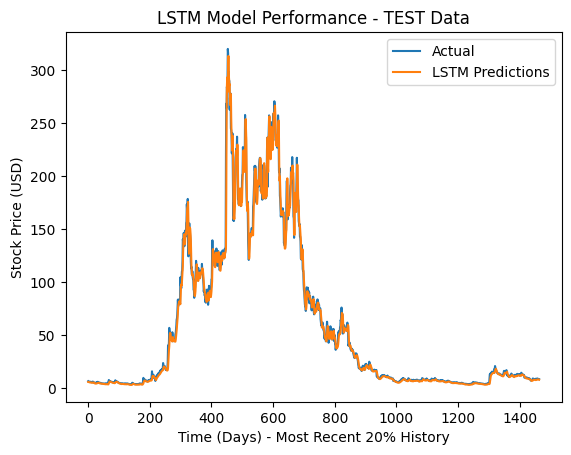

In [ ]:
# Plotting the results
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Model Performance - TEST Data')   # Set the title for the LSTM graph
plt.xlabel("Time (Days) - Most Recent 20% History")
plt.ylabel("Stock Price (USD)")
plt.show()

**Observations:**

* The **x-axis** is in **days** within the *test* set.  It is understandable, but not the same range as the previous graphs (using **date** along the x-axis).
  * This might be worth considering adjusting, but this being the default axis likely makes it more focused to analyze day-by-day.

* The predictions **line up almost exactly** with the actual test data.  This is always a little **suspicious** since stock predictions usually cannot be so accurate... especially for a volatile stock like **NVAX**.
  * If it were this straightforward, I would assume more people would be more successful investing in stocks.

  * Whenever you see such accurate predictions, **overfitting** is always a possible concern that should be attended to.
    * You don't want to make a large investment based on the success of a model for one stock.  I would be more confident seeing similar results with other stocks (although, if it's a model construction issue leading to overfitting, then the particular stock likely does not matter).
    
    * In any case, **further research** into oerfitting would be a good idea before making any big financial bets.

#### Evaluate Prediction Model

In [ ]:
# Evaluating the model
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), lstm_predictions))
lstm_mae = mean_absolute_error(scaler.inverse_transform(y_test), lstm_predictions)

print('-' * 80)  # Prints 80 hyphens to create a horizontal rule
print(bold_text("LSTM RMSE: ") + f" {lstm_rmse:.2f}")
print(bold_text("LSTM MAE: ") + f" {lstm_mae:.2f}")
print('-' * 80)  # Prints 80 hyphens to create a horizontal rule

--------------------------------------------------------------------------------
LSTM RMSE:  7.53
LSTM MAE:  3.61
--------------------------------------------------------------------------------


In [ ]:
# COMPARE Against the Other Model Results
print('-' * 80)
print(bold_text("Linear Regression RMSE: ") + f" {lin_rmse:.2f}")
print(bold_text("Linear Regression MAE: ") + f" {lin_mae:.2f}")
print('-' * 80)
print(bold_text("Exponential Smoothing RMSE: ") + f" {es_rmse:.2f}")
print(bold_text("Exponential Smoothing MAE: ") + f" {es_mae:.2f}")
print('-' * 80)
print(bold_text("ARIMA RMSE: ") + f" {arima_rmse:.2f}")
print(bold_text("ARIMA MAE: ") + f" {arima_mae:.2f}")
print('-' * 80)

--------------------------------------------------------------------------------
Linear Regression RMSE:  23.69
Linear MAE:  13.88
--------------------------------------------------------------------------------
Exponential Smoothing RMSE:  75.91
Exponential Smoothing MAE:  51.10
--------------------------------------------------------------------------------
ARIMA RMSE:  74.87
ARIMA MAE:  52.76
--------------------------------------------------------------------------------


**Observations:**

* As we can see, the **LSTM** was *far more successful* than the other methods.  In comparisons just based on these two error methods (**RMSE** & **MAE**), LSTM is roughly:
  1. **3x** better than **Linear** *RMSE* & **4x** better in *MAE*
  2. **10x** better than **Exponential Smoothing (and ARIMA)** *RMSE* & **13x** better in *MAE*.